# Phase 4
# Unsupervised ML (clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

4.1 "Create 3 clusters as below.

Sensitive Area's

Moderate Area's

Peaceful Area's"

4.2 Create DataFrame for each cluster that shows data according to the areas.

4.3 "Analyse your clusters and prepare a report that explains all your observations.

Example -

What is impacting more crimes in sensitive areas.
What needs to be done to reduce crime.
Most safe and unsafe districts.
Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

4.4 Capstone project overall story in your own words. Min 1000 words.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [5]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [6]:
district_wise_01=district_wise[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]

In [7]:
district_wise_01

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9010,DELHI UT,STF,2012,6
9011,DELHI UT,WEST,2012,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787


In [8]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [9]:
districtwise_sc

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [10]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [11]:
districtwise_sc=districtwise_sc[districtwise_sc['DISTRICT']!='TOTAL']

In [12]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [13]:
districtwise_02=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [14]:
districtwise_02

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


In [15]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [16]:
districtwise_st

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [17]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [18]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [19]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [20]:
districtwise_03=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [21]:
districtwise_03

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [22]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [23]:
districtwise_child

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [24]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [25]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [26]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [27]:
districtwise_04=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [28]:
districtwise_04

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [29]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [30]:
districtwise_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [31]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [32]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [33]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [34]:
districtwise_05=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [35]:
districtwise_05

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


# MERGING THE ABOVE DATASETS

In [36]:
cluster=pd.merge(district_wise_01,districtwise_02,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_03,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_04,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_05,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

# GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS

In [37]:
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,4154,2001,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,2001,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,5818,2001,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,2001,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,2001,89,14,0,475
...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,202,2012,0,0,7,6
8405,DAMAN & DIU,DIU,2012,37,2012,0,0,1,2
8406,LAKSHADWEEP,LAKSHADWEEP,2012,60,2012,0,0,0,2
8407,PUDUCHERRY,KARAIKAL,2012,787,2012,1,0,7,11


In [38]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [39]:
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,7377,0,33,206,458
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,0,3,1,11
4,A & N ISLANDS,NORTH,2012,115,0,0,7,9
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,2012,3023,0,8,44,552


# PHASE 4--CLUSTERING
## 4.1  CLUSTERING USING THE KMEANS!!

In [40]:
x=cluster.iloc[:,2:]

In [41]:
x

,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,2007,807,0,1,10,54
1,20059,7377,0,33,206,458
2,2012,24,0,0,2,2
3,20059,235,0,3,1,11
4,2012,115,0,0,7,9
...,...,...,...,...,...,...
796,24078,16958,8,9,8,3180
797,24078,4746,0,0,2,134
798,24078,1760,0,1,7,61
799,2012,3023,0,8,44,552


In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [44]:
y_kmeans=kmeans.fit_predict(x)

# 4.2 Create DataFrame for each cluster that shows data according to the areas.

# REGION 1) Peaceful Area's

In [45]:
peaceful_regions=cluster[y_kmeans==0]

In [46]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,61959,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,59927,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,75471,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,58147,1537,128,574,5002
11,ANDHRA PRADESH,EAST GODAVARI,24078,93193,2042,223,213,9514
...,...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,24078,35343,6,15,237,7811
792,WEST BENGAL,MURSHIDABAD,24078,85689,13,13,923,27004
793,WEST BENGAL,NADIA,24078,79313,0,1,94,17582
794,WEST BENGAL,PASCHIM MIDNAPUR,22077,38981,6,11,29,7875


# REGION 2) Moderate Area's

In [47]:
Moderate_regions=cluster[y_kmeans==1]

In [48]:
Moderate_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,7377,0,33,206,458
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,0,3,1,11
4,A & N ISLANDS,NORTH,2012,115,0,0,7,9
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,2012,3023,0,8,44,552


# REGION 3) Senstive Area's

In [49]:
Sensitive_regions=cluster[y_kmeans==2]

In [50]:
Sensitive_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
10,ANDHRA PRADESH,CYBERABAD,20075,141743,1657,341,296,15411
15,ANDHRA PRADESH,HYDERABAD CITY,24078,202931,1293,76,872,19685
121,BIHAR,PATNA,24078,147542,1503,33,893,5931
168,GUJARAT,AHMEDABAD COMMR.,24078,218005,798,41,1435,14973
304,KARNATAKA,BANGALORE COMMR.,24078,350347,1423,16,675,9010
342,KERALA,ERNAKULAM RURAL,18072,114393,299,14,269,3072
372,MADHYA PRADESH,BHOPAL,24078,169575,1565,226,1326,7087
383,MADHYA PRADESH,GWALIOR,24078,111206,2310,595,1582,5760
386,MADHYA PRADESH,INDORE,24078,204398,1139,421,4401,10392
388,MADHYA PRADESH,JABALPUR,24078,119446,952,649,1203,7855


# 4.3.3  "Analyse your clusters and prepare a report that explains all your observations

# MOST SAFE AREAS

In [51]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

In [52]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [53]:
peaceful_regions.head().reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,RAJASTHAN,JAIPUR SOUTH,14063,35748,298,112,169,1998,52388
1,TAMIL NADU,CHENGAI,8010,43561,207,4,62,1054,52898
2,ANDHRA PRADESH,VIJAYAWADA,10015,39350,753,153,159,5295,55725
3,TAMIL NADU,SIVAGANGAI,24078,33704,799,0,113,1147,59841
4,GUJARAT,BHARUCH,24078,34364,160,310,349,1270,60531


# MOST SENSITIVE AREAS

In [54]:
Sensitive_regions['OVERALL CRIME']=Sensitive_regions.iloc[:,2:].sum(axis=1)

In [55]:
Sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [56]:
Sensitive=Sensitive_regions.reset_index().drop(['index'],axis=1).head()

In [57]:
Sensitive

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,KARNATAKA,BANGALORE COMMR.,24078,350347,1423,16,675,9010,385549
1,GUJARAT,AHMEDABAD COMMR.,24078,218005,798,41,1435,14973,259330
2,MAHARASHTRA,MUMBAI COMMR.,14063,222670,186,11,2865,9304,249099
3,ANDHRA PRADESH,HYDERABAD CITY,24078,202931,1293,76,872,19685,248935
4,MADHYA PRADESH,INDORE,24078,204398,1139,421,4401,10392,244829


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

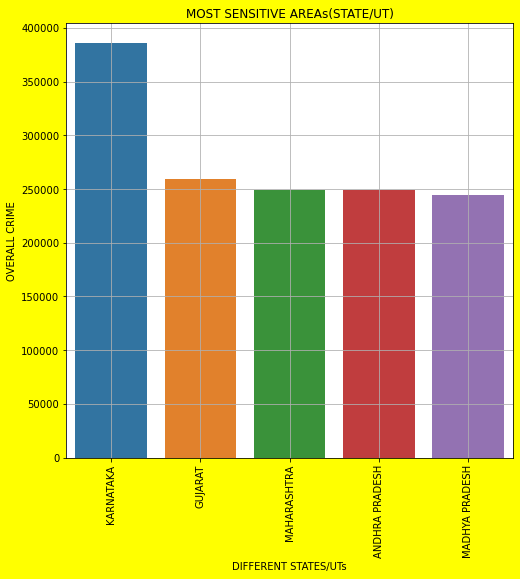

In [59]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Sensitive['STATE/UT'],y=Sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST SENSITIVE AREAs(STATE/UT)")
plt.grid()
plt.show()

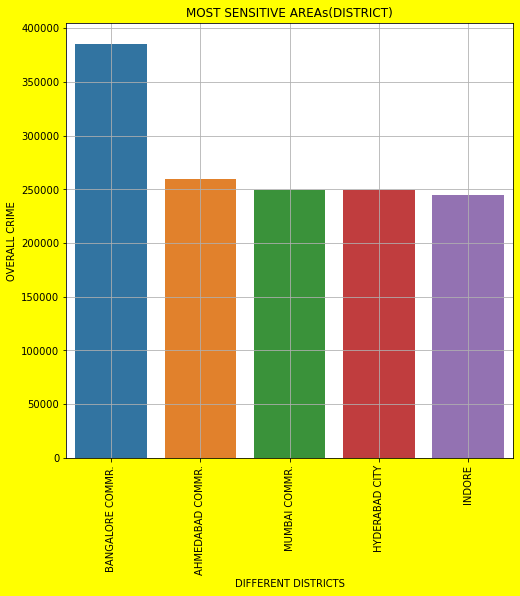

In [60]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Sensitive['DISTRICT'],y=Sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICTS")
plt.title("MOST SENSITIVE AREAs(DISTRICT)")
plt.grid()
plt.show()

# 4.3.1  What is impacting more crimes in sensitive areas?

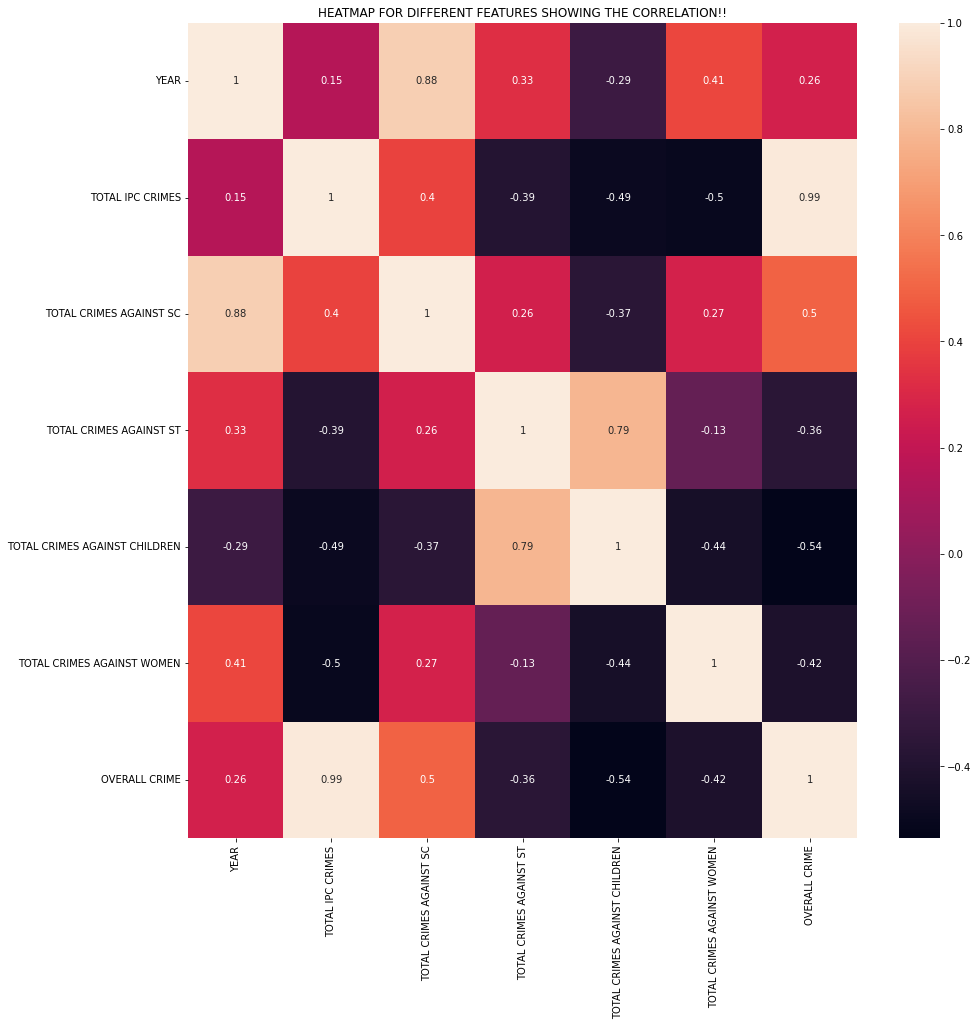

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(Sensitive.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

THE HEATMAP DESCRIBING THE CORRELATION FOR DIFFERENT FEATURES CAN BE SEEN FROM THE ABOVE PLOT

#  What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. Here are some measures that can help reduce crime in India:

Strengthen law enforcement: The government needs to allocate more resources and funds to law enforcement agencies to improve their capacity to prevent and investigate crimes. Police reforms should be implemented to make the force more accountable, efficient, and effective.

Address socio-economic factors: Poverty, unemployment, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job opportunities, improving access to education, and providing basic amenities like water, electricity, and healthcare.

Strengthen the justice system: The justice system in India is often slow and inefficient, which can lead to frustration and disillusionment among the public. Steps should be taken to streamline the justice system and make it more responsive to the needs of the people.

Raise public awareness: People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.

Improve community policing: Community policing can help build trust between the police and the community, leading to better crime prevention and investigation. The police should work closely with the community to identify and address local issues.

Use technology: Technology can play a significant role in preventing and solving crimes. The government should invest in modernizing the police force with advanced technology like CCTV cameras, drones, and digital forensics.

Reform the prison system: The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.

# 4.4 Capstone project overall story in your own words. Min 1000 words

India is a diverse country with a population of over 1.38 billion people, and crime is a significant issue that affects its citizens. According to the data available from the National Crime Records Bureau (NCRB) for the year 2011, there were a total of 2.27 million reported cases of crime in India in 2011, a decrease of 4.54% from the previous year.

Crimes against women, including rape, sexual harassment, and domestic violence, continue to be a major concern in India. In 2011, there were 2,13,949 reported cases of crimes against women, and 11.04% of these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public awareness, crimes against women remain a persistent problem in India.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2011, there were 33,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements being made to control the crimes against children a increase by 254.86% can be seen from the year 2001 to 2011.Madhya Pradesh records the most cases counting to 40,217 over the years and is followed by Uttar Pradesh and Maharastra counting the numbers to 29,969 and 27,845.In the year 2011 33,718 cases were recorded against SC.

Involvement of juveniles can also be seen as a serious threat to the society.Often misguided,mishandled the juveniles tends towards to opt the wrong ways. As its easy to influence them stricter laws should be made to overcome this issue.Total of 23,597 cases were recorded in 2001 which then increased to 27,471 in the year 2011.Madhya Pradesh have the most cases recording to 61,939 and manipur being the least in the cases.

Human right violation by the police too offers significant amount of share in total ipc crimes.Year 2009 have the most cases recorded in any year , counting the crimes to 664.There is 82.815% decrease in the cases from the year 2001 to 2011.Chattisgarh have the most cases of human right violation across the states 2001 to 2011.

Its also important to note that those who have the duty of maintaining the law and order in the state i,e the police department have also the cases of getting assaulted by the Rioutous_mob,extremists,in counter insurgency operation,border opeartions and many more.Uttar pradesh recorded 2150 cases from the year 2001 to 2011, Jammu Kashmir also holds the 4 position with the total count of 1142.0 .Almost 5% increase in the cases can be seen from the year 2001 to 2011.In JAMMU & KASHMIR a decrease in the cases of assaults and killing of the police/army personnel acan be seen as the cases in 2001 were 300 which reduced to 50 in 2010 , 83.33 % direct decrease in the cases.

Maharastra, Uttar Pradesh and Madhya Pradesh had the most cases for DACOITY/ROBBERY/BURGALARY/THEFT combined together with counts being Maharastra-7,17,452
Madhya Pradesh-3,89,927
UTTAR PRADESH-3,66,166

Overall, while there has been a increase in the number of reported crimes in India hinting that there are still significant challenges to be addressed. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.

# Thank You :-)